# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import numpy as np
from scipy import sparse
import sklearn as sk


In [5]:
from sklearn import preprocessing

In [6]:
from sklearn.linear_model import LassoCV

In [114]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/insurance.csv")

In [115]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
df = pd.get_dummies(df)

In [117]:
df = df.drop(columns = ['sex_male', 'smoker_no'])

In [118]:
df['charges_dup'] = df.loc[:, 'charges']

In [119]:
df = df.drop(columns = ['charges', 'region_southwest'])

In [120]:
df

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,charges_dup
0,19,27.900,0,1,1,0,0,0,16884.92400
1,18,33.770,1,0,0,0,0,1,1725.55230
2,28,33.000,3,0,0,0,0,1,4449.46200
3,33,22.705,0,0,0,0,1,0,21984.47061
4,32,28.880,0,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,10600.54830
1334,18,31.920,0,1,0,1,0,0,2205.98080
1335,18,36.850,0,1,0,0,0,1,1629.83350
1336,21,25.800,0,1,0,0,0,0,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [121]:
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:, -1])

In [122]:
cut = int((len(data) * .8) // 1)

In [123]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]




# 3.) Normalize the Data

In [124]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [125]:
in_data_scale

array([[-1.45390122, -0.47403991, -0.90286618, ..., -0.56943606,
        -0.55791981, -0.6155209 ],
       [-1.52464584,  0.4911621 , -0.06353793, ..., -0.56943606,
        -0.55791981,  1.6246402 ],
       [-0.81719959,  0.36455128,  1.61511857, ..., -0.56943606,
        -0.55791981,  1.6246402 ],
       ...,
       [-0.03900872,  1.95211949, -0.90286618, ...,  1.75612342,
        -0.55791981, -0.6155209 ],
       [ 1.65886228, -1.50008089, -0.06353793, ..., -0.56943606,
         1.79237229, -0.6155209 ],
       [ 1.02216066,  0.18367867, -0.06353793, ..., -0.56943606,
        -0.55791981,  1.6246402 ]])

# 4.) Get lambda from Lasso cross validation

In [ ]:
# use lasso cvm, check .alpha_

In [126]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [127]:
a = modCV.alpha_

In [128]:
a

133.34880015958146

This is a very large lambda, so highly penalizing

# 5.) Run a lasso regression with that Lambda

In [131]:
# use lasso and set alpha = to lambda
from sklearn.linear_model import Lasso

In [132]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)


# 6.) Visualize the coefficients 

In [135]:
mod1.coef_

array([3562.0377078 , 1885.27475593,  395.84593359,    0.        ,
       9328.6028876 ,  274.4562296 ,   59.97132192,   -0.        ])

In [143]:
df.iloc[0,:-1]

age                 19.0
bmi                 27.9
children             0.0
sex_female           1.0
smoker_yes           1.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
Name: 0, dtype: float64

In [152]:
column_names = list(df.columns.values)

In [153]:
column_names = column_names[:-1]
column_names

['age',
 'bmi',
 'children',
 'sex_female',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast']

In [156]:
from matplotlib.pyplot import figure

<function matplotlib.pyplot.show(*args, **kw)>

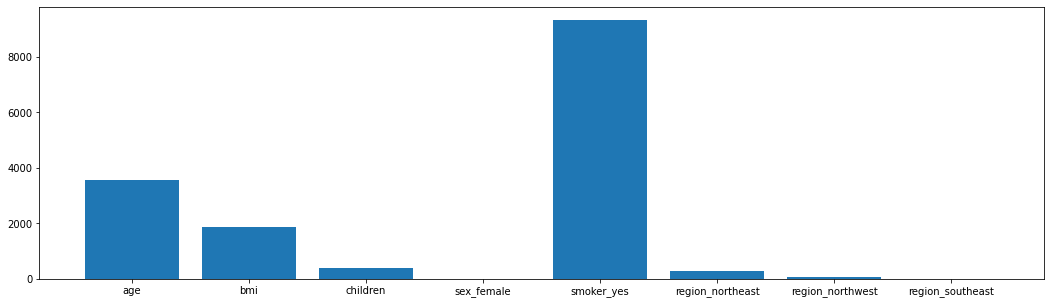

In [176]:
figure(figsize = (18,5))
plt.bar(column_names, mod1.coef_)
plt.show

# 7.) Interpret the coefficients

Age, BMI, and Smoker seem to be the most important but they need to be re-normalized in order to see their regression effect.

Children and Region Northeast have a similar magnitude of effect, with Region Southeast, Gender, and Region Northwest being removed by the Lasso Regression.


# 8.) Compare in and out of sample MSE’s

In [170]:
train_pred = mod1.predict(in_data_scale)


In [171]:
test_pred = mod1.predict(out_data_scale)

In [163]:
from sklearn import metrics

In [174]:
np.sqrt(sklearn.metrics.mean_squared_error(in_target,train_pred))

6043.80801621451

In [175]:
np.sqrt(sklearn.metrics.mean_squared_error(out_target,test_pred))

6098.556774653077